# Multiple Linear Regression
- training and test split, some standardization
- creating custom function to measure performance

#### Ordinary Least Squares 
- quick glance at performance on test

#### Lasso
- using LassoCV to capture best alpha
- **removing features with low coefficients

#### GridsearchCV
- hypertuing and capturing best alpha 

In [13]:
import pandas as pd 
import numpy as np 

pd.set_option('display.max_columns', None)

### Importing feature engineered data 

In [29]:
dummy = pd.read_csv('../nicole/data/dummy_nicole_feature_engineered.csv')

In [30]:
dummy.head()

,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,MoSold,YrSold,lat,long,TotalPorchSF,BsmtBath,Bath,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
0,856.0,126000,64.9,7890.0,6,6,1939.0,1950.0,0.0,3,3,3,3,1,3,238.0,0.0,618.0,856.0,3,856.0,0.0,0,1.0,0.0,1,0.0,2,3,4,1,4,2.0,399.0,3,3,0.0,3.0,2010.0,42.017780,-93.651452,166.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
1,1049.0,139500,42.0,4235.0,5,5,1984.0,1984.0,149.0,4,3,4,3,2,6,552.0,393.0,104.0,1049.0,3,1049.0,0.0,0,1.0,0.0,2,0.0,2,4,5,0,0,1.0,266.0,3,3,0.0,2.0,2009.0,42.024697,-93.664186,105.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
2,1049.0,139500,42.0,4235.0,5,5,1984.0,1984.0,149.0,4,3,4,3,2,6,552.0,393.0,104.0,1049.0,3,1049.0,0.0,0,1.0,0.0,2,0.0,2,4,5,0,0,1.0,266.0,3,3,0.0,2.0,2009.0,42.024697,-93.664186,105.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
3,1001.0,124900,60.0,6060.0,5,9,1930.0,2007.0,0.0,4,3,3,3,1,5,737.0,0.0,100.0,837.0,5,1001.0,0.0,0,0.0,0.0,1,0.0,2,4,5,0,0,1.0,216.0,3,1,154.0,11.0,2007.0,42.021389,-93.614855,128.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
4,1039.0,114000,80.0,8146.0,4,8,1900.0,2003.0,0.0,4,4,2,3,1,1,0.0,0.0,405.0,405.0,4,717.0,322.0,0,0.0,0.0,1,0.0,2,3,6,0,0,1.0,281.0,3,3,0.0,5.0,2009.0,42.038070,-93.612065,279.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,

In [31]:
dummy.dtypes

GrLivArea            float64
SalePrice              int64
LotFrontage          float64
LotArea              float64
OverallQual            int64
                      ...   
GarageType_Detchd      int64
GarageType_None        int64
GarageFinish_None      int64
GarageFinish_RFn       int64
GarageFinish_Unf       int64
Length: 143, dtype: object

# Multiple Linear Regression

In [71]:
#import packages 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import RidgeCV, LassoCV

### Creating some functions:

In [72]:
# Function for scoring training set
def train_scores(model, X, y):
    '''
    model: fitted model
    X: Matrix of explanatory variables (train set)
    y: Dependant variable (train set)
    '''
    model.fit(X, y)
    #cv_scores = cross_val_score(model, X, y, cv=5) # 5-fold cross-validation

    print('Training Score:', np.round(model.score(X, y), 4))
    #print('Cross-validation scores:', np.round(cv_scores, 4))
    #print('Mean cross-validation score:', np.round(cv_scores.mean(), 4))

In [73]:
# Function for scoring test set
def test_scores(model, X, y):
    '''
    model: fitted model
    X: Matrix of explanatory variables (test set)
    y: Dependant variable (test set)
    '''
    model.fit(X, y)
    print('Test Score:', np.round(model.score(X, y), 4))

In [86]:
# Function for MSE & RMSE scoring
def accuracy_scores(model, X, y):
    '''
    model: fitted model
    X: Matrix of explanatory variables (test set)
    y: Dependant variable (test set)
    '''
    yhat = model.predict(X)
    print('Mean Squared Error:', np.round(metrics.mean_squared_error(y, yhat), 4)) 
    print('Root Mean Squared Error:', np.round((metrics.mean_squared_error(y, yhat))**0.5, 4)) 

#### Naming X and Y variables

In [84]:
#naming our X and Y variables
y_SP = dummy['SalePrice']
X = dummy.drop(['SalePrice','lat','long'], axis = 1)

y_lnSP = np.log(y_SP)

scaler = MinMaxScaler()
standard = StandardScaler()

In [85]:
X.shape

(2624, 140)

### Splitting the data into training & testing, and normalization

In [79]:
# importing from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# train-test split of data
X_train, X_test, y_train, y_test = train_test_split(X, y_lnSP, test_size = 0.20, 
                                                    random_state = 2, shuffle = True ) #toggle b/w y & log(y)

In [80]:
#normalization & standardization
scaler = MinMaxScaler() #standard = StandardScaler()

X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_s = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

X_train_s.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,MoSold,YrSold,TotalPorchSF,BsmtBath,Bath,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
0,0.159604,0.152177,0.030519,0.444444,0.500,0.644444,0.200000,0.000000,0.333333,0.5,0.6,0.6,0.25,0.666667,0.227273,0.209043,0.087320,0.320937,0.5,0.239461,0.000000,0.0,0.000000,0.25,0.25,0.00,0.5,0.50,0.4,0.000000,0.0,0.2,0.215108,0.6,0.6,0.000000,0.909091,0.50,0.000000,0.166667,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.304468,0.139280,0.021163,0.444444,0.500,0.681481,0.283333,0.000000,0.000000,0.5,0.8,0.6,0.50,0.500000,0.112325,0.000000,0.170460,0.195000,1.0,0.261921,0.301282,0.0,0.000000,0.00,0.25,0.25,0.5,0.50,0.5,0.333333,0.2,0.2,0.207194,0.6,0.6,0.000000,0.545455,0.50,0.231980,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.281140,0.180653,1.000000,0.500,0.977778,0.966667,0.590698,1.000000,0.5,1.0,0.6,1.00,1.000000,0.987762,0.000000,0.407803,0.980625,1.0,0.968901,0.821581,0.0,0.333333,0.00,0.75,0.25,0.5,1.00,0.9,0.333333,0.8,0.6,0.635971,0.6,0.6,0.146067,0.818182,0.25,0.336371,0.333333,0.583333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### Ordinary Least Squares (OLS)

In [81]:
ols = LinearRegression()
ols.fit(X_train_s, y_train)

#print("Intercept:", ols.intercept_)
#print("Coefficients:", ols.coef_)

LinearRegression()

In [82]:
# OLS training set scores, including CV scores
train_scores(ols, X_train_s, y_train)

Training Score: 0.9313


In [83]:
# OLS test set score
test_scores(ols, X_test_s, y_test)

Test Score: 0.9424


## Lasso 

#### Lasso Visualization

In [11]:
alphas = np.logspace(-4, 4, 10) #np.linspace(1e-4,1, 500) 

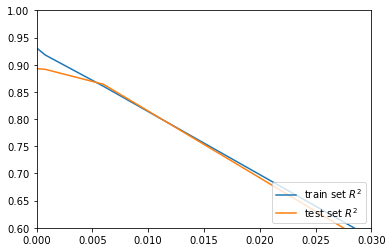

In [68]:
lasso = Lasso(max_iter = 10000)
coefs = []
r2_train =[]
r2_test =[]
norm = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_s, y_train)
    coefs.append(lasso.coef_)
    
    r2_train.append(lasso.score(X_train_s, y_train))
    r2_test.append(lasso.score(X_test_s, y_test))
    ##add some MSE
    
#print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
#print(r2_score(y_train, pred_train_lasso))
 
plt.plot(alphas, r2_train, label=r'train set $R^2$')
plt.plot(alphas, r2_test, label=r'test set $R^2$')

plt.xlim([0, .03])
plt.ylim([.6, 1])
plt.legend(loc=4)


(-0.5, 2.5)

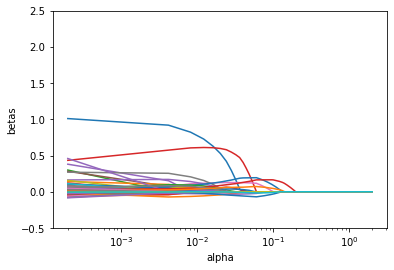

In [618]:
#coefficients vs alphas
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('betas')
plt.ylim([-.5, 2.5])

In [87]:
reg = Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=10000, tol=0.0001)

In [88]:
reg.fit(X_train_s, y_train)
print('Lasso Regression: R^2 score on training set', reg.score(X_train_s, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test_s, y_test)*100)

Lasso Regression: R^2 score on training set 92.92755120821433
Lasso Regression: R^2 score on test set 89.26619329347669


#### LassoCV to optimize alpha

In [69]:
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
lasso_cv.fit(X_train_s, y_train)

lasso_cv.alpha_
lasso_cv.score(X_train_s, y_train)

#print('Best Lasso alpha:', lasso_mod.alpha_)

0.9292755120821432

#### finding best alpha value

In [633]:
from sklearn.model_selection import KFold, GridSearchCV

# define model
model = Lasso()
# define model evaluation method
cv = KFold(n_splits=5)
# define grid
grid = dict()
grid['alpha'] = np.logspace(-4, 4, 10)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_s, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

#results.feature_names_in_

MAE: -0.073
Config: {'alpha': 0.0001}


In [ ]:
#refit model
# lasso.set_params(alpha=lr_cv.alpha_)
# lasso.fit(X_train_std_df,Y_interact_train)
# b=mean_squared_error(Y_interact_test, lasso.predict(X_test_std_df))

print ("Test MSE - Lasso Regression:",((mean_squared_error(Y_interact_test, lr_pred ))))
print ("Tuning parameter for Lasso Regression (lambda value):",(lr_cv.alpha_))
print ("Lasso Score (R Squared:",((lasso.score(selected_test_X,Y_interact_test))))

b=lr_cv.coef_
b
print(pd.Series(b, selected_test_X.columns)) # Print coefficients 

In [284]:
y_prediction =  LR.predict(X_test)
y_prediction

array([357966.4066022 , 127099.16729412, 125031.64802667,  83409.83129668,
       194804.18487478, 162424.86197099, 133370.66996949, 180043.34320943,
       191428.49239882,  78912.97099265, 135166.18402039, 280842.33229638,
       486499.29970589, 131708.92713793, 191553.65323102, 127525.66391239,
       338806.78448947, 142346.13986403, 214391.09722916, 106034.35010782,
       283935.87599694, 365648.99917674,  68099.48720414, 139351.07596708,
       281955.91859922, 189911.5690129 , 129576.30965193, 203789.09171001,
       131716.47991472,  78881.56520982, 136394.85537429, 153152.70867063,
       125038.81488857, 221337.80661814, 267866.05733036, 296745.61580999,
       124156.81670007, 293606.03451603,  96852.27966524, 100900.22398376,
       128668.1477029 , 147429.53058026, 138971.91548591, 135915.22861742,
       123097.30430626,  85215.30008614, 211998.65716602,  85974.28960399,
       234987.9480284 , 127879.92226855, 107411.56827863, 128600.36857159,
        89747.68528312, 1

In [291]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
print(r2_score(y_test,y_prediction))
print(mean_squared_error(y_test,y_prediction))
print(np.sqrt(mean_squared_error(y_test,y_prediction)))

0.8689607425617404
828621902.1606473
28785.793408566096


In [236]:
X.describe()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,MoSold,YrSold,lat,long,TotalPorchSF,BsmtBath,Bath,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
count,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000
mean,1482.796494,69.552314,10089.203125,6.040015,5.617378,1970.320122,1983.696265,98.773628,3.370427,3.092607,3.450076,2.924543,1.602515,3.601372,4